In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('EBPlusPlusAdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp_final.csv')
train

FileNotFoundError: [Errno 2] No such file or directory: 'EBPlusPlusAdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp_final.csv'

In [ ]:
train.iloc[:,0:10].describe()

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660
count,9351.000000,11069.000000,11069.000000,11069.000000,11069.000000,9318.000000,11069.000000,10471.000000,9318.000000
mean,0.028386,11.251089,11.670693,160.950078,986.122273,0.000554,244.161495,0.630548,0.272673
std,0.239364,12.199371,11.671968,126.505719,416.277222,0.016930,229.434812,1.050209,2.424664
min,-0.090423,-0.525753,-0.516280,0.000000,232.315000,0.000000,3.371400,0.000000,0.000000
25%,0.000000,3.449200,4.597500,85.282600,705.773000,0.000000,106.114000,0.000000,0.000000
50%,0.000000,7.809006,8.640000,123.578000,905.364000,0.000000,178.330000,0.370900,0.000000
75%,0.000000,14.976397,14.987820,191.223000,1172.160000,0.000000,300.429000,0.865850,0.000000
max,17.995000,187.474945,402.218988,1995.021959,6818.118303,1.010100,4787.150000,32.316532,78.421300


# Class distribution + Handling Imbalanced Classes

<Axes: xlabel='TYPE'>

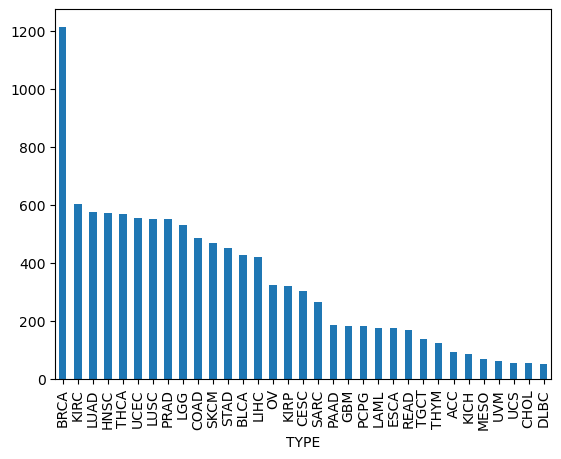

In [ ]:
train['TYPE'].value_counts().plot.bar()

<Axes: xlabel='STAGE'>

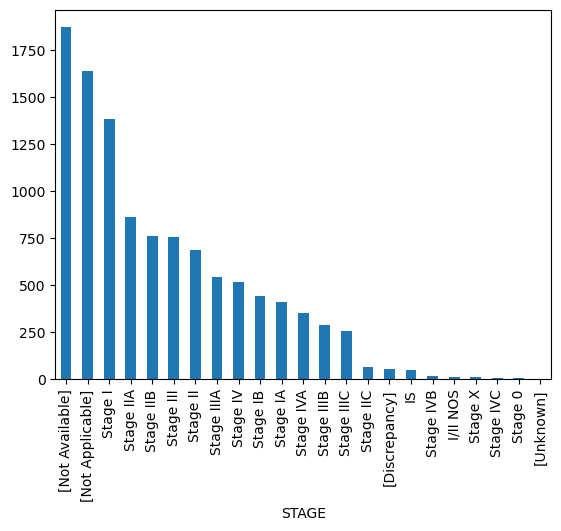

In [ ]:
train['STAGE'].value_counts().plot.bar()

# the contribution of type is more stable so we are choosing type as output

In [ ]:
train = train.drop(['STAGE'], axis = 1)

# Identify Missing Values with : isnull + sum



In [ ]:
train.info()
train.isnull().sum()
# train.isnull().sum().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Columns: 20533 entries, Unnamed: 0 to TYPE
dtypes: float64(20531), object(2)
memory usage: 1.7+ GB


Unnamed: 0         0
?|100130426     1718
?|100133144        0
?|100134869        0
?|10357            0
                ... 
ZYG11B|79699       0
ZYX|7791           0
ZZEF1|23140        0
ZZZ3|26009         0
TYPE              47
Length: 20533, dtype: int64

# Divide Data into X and y


In [ ]:
y = train['TYPE']
X = train.drop(['TYPE','Unnamed: 0'], axis = 1)
X.head()

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009
0,0.0,3.2661,3.9385,149.1350,2034.10,0.0,274.255,1.4409,0.0,0.0,...,183.9580,146.9740,20.6532,351.585,1050.910,0.4803,648.415,1841.020,1157.540,596.062
1,0.0,2.6815,8.9948,81.0777,1304.93,0.0,199.302,0.0000,0.0,0.0,...,264.1250,438.4640,57.1735,279.023,2979.870,31.4052,1166.020,3059.990,1895.990,801.637
2,0.0,1.7301,6.5650,86.4879,1054.66,0.0,348.393,0.5925,0.0,0.0,...,90.6532,190.1940,39.6978,495.334,914.827,0.5925,806.399,2655.610,1482.450,437.269
3,0.0,0.0000,1.5492,53.9117,2350.89,0.0,439.194,0.7746,0.0,0.0,...,260.2630,840.4340,17.8156,206.042,890.782,11.6189,553.834,2367.930,1140.200,512.781
4,0.0,0.0000,4.4709,66.9063,1257.99,0.0,149.215,0.0000,0.0,0.0,...,64.2685,63.1508,12.8537,117.919,894.730,7.8240,795.812,708.071,796.371,475.587


# feature scaling

In [ ]:
min_values = np.min(X, axis=0)
max_values = np.max(X, axis=0)
print('min values')
print(min_values)
print('max values')
print(max_values)

min values
?|100130426       -0.090423
?|100133144       -0.525753
?|100134869       -0.516280
?|10357            0.000000
?|10431          232.315000
                    ...    
ZYG11A|440590     -0.402069
ZYG11B|79699      46.019981
ZYX|7791         139.635000
ZZEF1|23140      122.108410
ZZZ3|26009        76.459534
Length: 20531, dtype: float64
max values
?|100130426         17.995000
?|100133144        187.474945
?|100134869        402.218988
?|10357           1995.021959
?|10431           6818.118303
                     ...     
ZYG11A|440590     9050.870000
ZYG11B|79699     21058.900000
ZYX|7791         49294.800000
ZZEF1|23140       8672.350000
ZZZ3|26009        8174.370000
Length: 20531, dtype: float64


## Identify Categorical Features


In [ ]:
categorical_features = train.select_dtypes(include = ['object']).columns.values
categorical_features

array(['Unnamed: 0', 'TYPE'], dtype=object)

## Identify Numerical Features


In [ ]:
numerical_features = X.select_dtypes(include = ['int64','float64']).columns.values
numerical_features

array(['?|100130426', '?|100133144', '?|100134869', ..., 'ZYX|7791',
       'ZZEF1|23140', 'ZZZ3|26009'], dtype=object)

# Identify Missing Values with : percentage of missing values



In [ ]:
missing_values_proportion = train.isnull().sum() / len(train)
threshold = 0.3

# Filter columns with more than 30% missing values
columns_with_more_than_30_percent_missing = missing_values_proportion[missing_values_proportion >= threshold]

print("Features with more than 30% missing values:")
print(columns_with_more_than_30_percent_missing)

# Filter columns with missing values between 10% and 30%
condition = (missing_values_proportion > 0) & (missing_values_proportion <= 0.3)
columns_with_missing_values_between_10_and_30_percent = missing_values_proportion[condition].index

# Print the columns with missing values between 10% and 30%
print("features with missing values between 10% and 30%:")
print(columns_with_missing_values_between_10_and_30_percent)


Features with more than 30% missing values:
Series([], dtype: float64)
features with missing values between 10% and 30%:
Index(['?|100130426', '?|136542', '?|26823', '?|280660', '?|317712',
       '?|340602', '?|391343', '?|391714', '?|404770', '?|441362',
       ...
       'ZNRF4|148066', 'ZP2|7783', 'ZP4|57829', 'ZPBP|11055', 'ZPBP2|124626',
       'ZPLD1|131368', 'ZSCAN1|284312', 'ZSCAN4|201516', 'ZSWIM2|151112',
       'TYPE'],
      dtype='object', length=4197)


# Impute Missing Values ( Numerical Features)



# Eliminate Features with > 30% Missing Values

In [ ]:
# Drop columns with more than 30% missing values
train = train.drop(columns=columns_with_more_than_30_percent_missing.index)

# KNN imputation less than 30%

If you didn’t specify ‘k’, the KNNImputer defaults to using 5 nearest neighbors

In [ ]:
numerical_columns_with_less_than_30_percent_missing = missing_values_proportion[(missing_values_proportion < threshold) & X[numerical_features].isnull().any()].index

if len(numerical_columns_with_less_than_30_percent_missing) > 0:
    num_imputer = KNNImputer()
    X[numerical_columns_with_less_than_30_percent_missing] = num_imputer.fit_transform(X[numerical_columns_with_less_than_30_percent_missing])


# Check

In [ ]:
X.isnull().sum()

?|100130426      0
?|100133144      0
?|100134869      0
?|10357          0
?|10431          0
                ..
ZYG11A|440590    0
ZYG11B|79699     0
ZYX|7791         0
ZZEF1|23140      0
ZZZ3|26009       0
Length: 20531, dtype: int64

In [ ]:
# Check if there are any missing values in the specified numerical columns after KNN imputation
if X[numerical_columns_with_less_than_30_percent_missing].isnull().any().any():
    print(X[numerical_columns_with_less_than_30_percent_missing].isnull().sum().sum())
else:
    print(0)


0


In [ ]:
# Concatenate 'SampleID', y (target variable), and the imputed X DataFrame
imputed_train = pd.concat([train['Unnamed: 0'], y, X], axis=1)
print(imputed_train.head())


                     Unnamed: 0 TYPE  ?|100130426  ?|100133144  ?|100134869  \
0  TCGA-OR-A5J1-01A-11R-A29S-07  ACC          0.0       3.2661       3.9385   
1  TCGA-OR-A5J2-01A-11R-A29S-07  ACC          0.0       2.6815       8.9948   
2  TCGA-OR-A5J3-01A-11R-A29S-07  ACC          0.0       1.7301       6.5650   
3  TCGA-OR-A5J5-01A-11R-A29S-07  ACC          0.0       0.0000       1.5492   
4  TCGA-OR-A5J6-01A-31R-A29S-07  ACC          0.0       0.0000       4.4709   

    ?|10357  ?|10431  ?|136542  ?|155060  ?|26823  ...  ZWILCH|55055  \
0  149.1350  2034.10       0.0   274.255   1.4409  ...      183.9580   
1   81.0777  1304.93       0.0   199.302   0.0000  ...      264.1250   
2   86.4879  1054.66       0.0   348.393   0.5925  ...       90.6532   
3   53.9117  2350.89       0.0   439.194   0.7746  ...      260.2630   
4   66.9063  1257.99       0.0   149.215   0.0000  ...       64.2685   

   ZWINT|11130  ZXDA|7789  ZXDB|158586  ZXDC|79364  ZYG11A|440590  \
0     146.9740    20.65

# Export Imputed Features


In [ ]:
imputed_train.to_csv('EBPlusPlusAdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp_imputed.csv')

# Apply log transformation to numerical features

In [ ]:
# Find features with negative or zero values
neg_zero_features = imputed_train[numerical_features].columns[(imputed_train[numerical_features] <= 0).any()]
print(neg_zero_features)

# Shift negative or zero values to ensure all values are positive
imputed_train[neg_zero_features] += abs(imputed_train[neg_zero_features].min()) + 1

# Apply log transformation to numerical features
imputed_train[numerical_features] = np.log1p(imputed_train[numerical_features])

# Display the head of the imputed_train DataFrame after log transformation
print(imputed_train.head())


Index(['?|100130426', '?|100133144', '?|100134869', '?|10357', '?|136542',
       '?|26823', '?|280660', '?|317712', '?|340602', '?|388795',
       ...
       'ZSCAN20|7579', 'ZSCAN23|222696', 'ZSCAN4|201516', 'ZSCAN5A|79149',
       'ZSCAN5B|342933', 'ZSWIM2|151112', 'ZSWIM5|57643', 'ZUFSP|221302',
       'ZXDA|7789', 'ZYG11A|440590'],
      dtype='object', length=11045)
                     Unnamed: 0 TYPE  ?|100130426  ?|100133144  ?|100134869  \
0  TCGA-OR-A5J1-01A-11R-A29S-07  ACC     0.737366     1.756452     1.864821   
1  TCGA-OR-A5J2-01A-11R-A29S-07  ACC     0.737366     1.650052     2.443310   
2  TCGA-OR-A5J3-01A-11R-A29S-07  ACC     0.737366     1.448295     2.206215   
3  TCGA-OR-A5J5-01A-11R-A29S-07  ACC     0.737366     0.926539     1.402532   
4  TCGA-OR-A5J6-01A-31R-A29S-07  ACC     0.737366     0.926539     1.944077   

    ?|10357   ?|10431  ?|136542  ?|155060   ?|26823  ...  ZWILCH|55055  \
0  5.018173  7.618300  0.693147  5.617698  1.235733  ...      5.220129   
1 

# New range after LOG

In [ ]:
min_values_log = imputed_train[numerical_features].min()
max_values_log = imputed_train[numerical_features].max()

print('Min values after log transformation:')
print(min_values_log)
print('\nMax values after log transformation:')
print(max_values_log)



Min values after log transformation:
?|100130426      0.693147
?|100133144      0.693147
?|100134869      0.693147
?|10357          0.693147
?|10431          5.452389
                   ...   
ZYG11A|440590    0.693147
ZYG11B|79699     3.850573
ZYX|7791         4.946168
ZZEF1|23140      4.813065
ZZZ3|26009       4.349756
Length: 20531, dtype: float64

Max values after log transformation:
?|100130426       2.999994
?|100133144       5.247028
?|100134869       6.003233
?|10357           7.599412
?|10431           8.827485
                   ...    
ZYG11A|440590     9.110882
ZYG11B|79699      9.955126
ZYX|7791         10.805594
ZZEF1|23140       9.068010
ZZZ3|26009        9.008881
Length: 20531, dtype: float64


# visualize the effects of the log transformation

# For few features

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

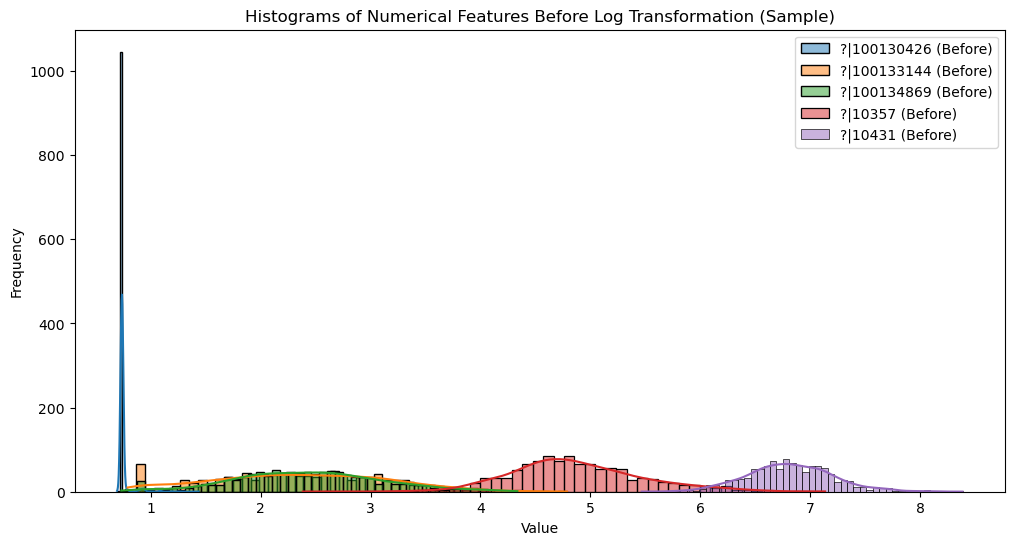

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

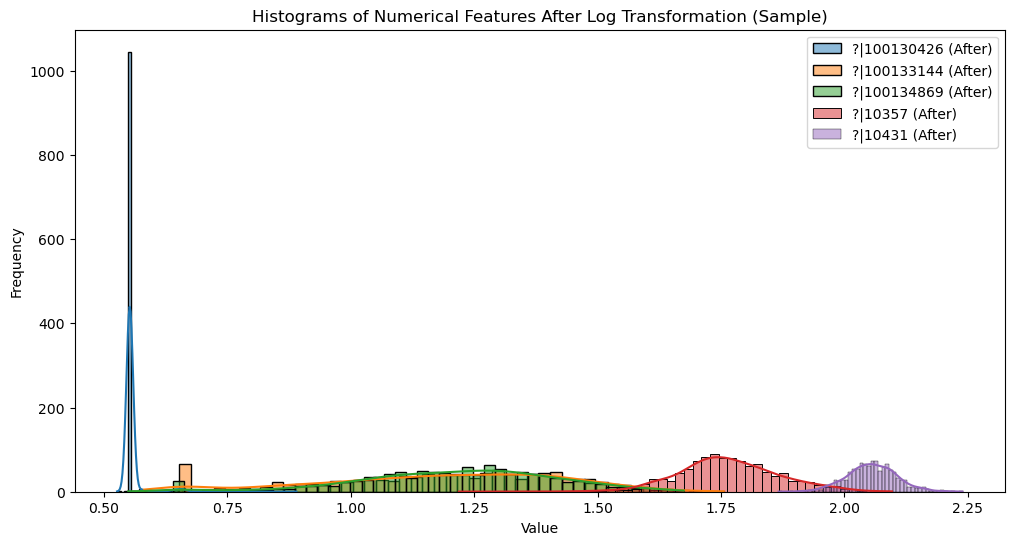

Summary Statistics Before Log Transformation:
       ?|100130426  ?|100133144  ?|100134869      ?|10357      ?|10431
count  1107.000000  1107.000000  1107.000000  1107.000000  1107.000000
mean      0.747779     2.355290     2.441434     4.873358     6.818801
std       0.053684     0.781836     0.668092     0.611051     0.392134
min       0.693147     0.788913     0.732094     2.383815     5.467406
25%       0.737366     1.788086     1.981012     4.485573     6.558063
50%       0.737366     2.343884     2.427452     4.807727     6.809415
75%       0.737366     2.939106     2.873351     5.221317     7.074286
max       1.435209     4.787777     4.336276     7.136108     8.386879

Summary Statistics After Log Transformation:
       ?|100130426  ?|100133144  ?|100134869      ?|10357      ?|10431
count  1107.000000  1107.000000  1107.000000  1107.000000  1107.000000
mean      0.557929     1.181764     1.216214     1.765023     2.055277
std       0.028051     0.244667     0.201682     0.10423

In [ ]:
# Select a subset of numerical features and a sample of the data
sample_numerical_features = numerical_features[:5]
sample_data = imputed_train.sample(frac=0.1, random_state=42)

# Plot histograms of numerical features before log transformation
plt.figure(figsize=(12, 6))
for feature in sample_numerical_features:
    sns.histplot(sample_data[feature], bins=50, alpha=0.5, label=feature + " (Before)", kde=True)
plt.title("Histograms of Numerical Features Before Log Transformation (Sample)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Plot histograms of numerical features after log transformation
plt.figure(figsize=(12, 6))
for feature in sample_numerical_features:
    sns.histplot(np.log1p(sample_data[feature]), bins=50, alpha=0.5, label=feature + " (After)", kde=True)
plt.title("Histograms of Numerical Features After Log Transformation (Sample)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Print summary statistics for each numerical feature
print("Summary Statistics Before Log Transformation:")
print(sample_data[sample_numerical_features].describe())
print("\nSummary Statistics After Log Transformation:")
print(np.log1p(sample_data[sample_numerical_features]).describe())


# another aproach to hundle pos and neg and 0 values  with log

In [ ]:
# Find the minimum value across numerical features
min_value = imputed_train[numerical_features].min().min()

# If the minimum value is negative, add its absolute value plus 1 to all values
if min_value < 0:
    offset = np.abs(min_value) + 1
    imputed_train[numerical_features] += offset

imputed_train[numerical_features] = np.log1p(imputed_train[numerical_features])

print(imputed_train.head())


                     Unnamed: 0 TYPE  ?|100130426  ?|100133144  ?|100134869  \
0  TCGA-OR-A5J1-01A-11R-A29S-07  ACC      0.55237     1.013944     1.052506   
1  TCGA-OR-A5J2-01A-11R-A29S-07  ACC      0.55237     0.974579     1.236433   
2  TCGA-OR-A5J3-01A-11R-A29S-07  ACC      0.55237     0.895392     1.165091   
3  TCGA-OR-A5J5-01A-11R-A29S-07  ACC      0.55237     0.655725     0.876523   
4  TCGA-OR-A5J6-01A-31R-A29S-07  ACC      0.55237     0.655725     1.079795   

    ?|10357   ?|10431  ?|136542  ?|155060   ?|26823  ...  ZWILCH|55055  \
0  1.794784  2.153888  0.526589  1.889748  0.804569  ...      1.827791   
1  1.690055  2.101040  0.526589  1.840522  0.526589  ...      1.884065   
2  1.701628  2.074670  0.526589  1.925153  0.669173  ...      1.708018   
3  1.614181  2.170535  0.526589  1.958293  0.703348  ...      1.881833   
4  1.654936  2.096552  0.526589  1.793769  0.526589  ...      1.644517   

   ZWINT|11130  ZXDA|7789  ZXDB|158586  ZXDC|79364  ZYG11A|440590  \
0     1.791

# Check if any new missing values were generated after log

In [ ]:
missing_values_after = imputed_train.isnull().sum()

if (missing_values_after > 0).any():
    print("New missing values were generated after the log transformation:")
    print(missing_values_after[missing_values_after > 0])
else:
    print("No new missing values were generated after the log transformation.")


New missing values were generated after the log transformation:
TYPE    47
dtype: int64


# apply yeojohnson transformation for hundle outliers

In [ ]:
from scipy.optimize import minimize_scalar

# Define the Yeo-Johnson transformation function
def yeojohnson_transform(x, lmbda):
    if lmbda == 0:
        return np.log1p(x)
    else:
        return np.where(x >= 0, (x ** lmbda - 1) / lmbda, -((-x) ** lmbda - 1) / lmbda)

# Define the negative log-likelihood function for Yeo-Johnson transformation
def neg_llf(lmbda, data):
    y = yeojohnson_transform(data, lmbda)
    llf = _yeojohnson_llf(lmbda, data)  # You need to implement this function
    if llf is None:
        return float('inf')  # Return a large value to indicate failure
    return -llf

# Define the negative log-likelihood function specific to Yeo-Johnson
def _yeojohnson_llf(lmbda, data):
    # Implement the log-likelihood function based on your specific requirements
    pass

# Apply the Yeo-Johnson transformation to numerical features
for col in numerical_features:
    # Optimize lambda parameter using a custom initial point
    res = minimize_scalar(neg_llf, args=(imputed_train[col],), method='bounded', bounds=(-2, 2))
    lmbda = res.x
    transformed_data = yeojohnson_transform(imputed_train[col], lmbda)
    imputed_train[col] = transformed_data






# check if there is still outliers

In [ ]:

numerical_columns = imputed_train.select_dtypes(include=['int64', 'float64']).columns


outliers_info = {}

for col in numerical_columns:
    z_scores = zscore(imputed_train[col])
    outliers_mask = (z_scores > threshold) | (z_scores < -threshold)
    if outliers_mask.any():
        outliers_info[col] = outliers_mask.sum()

print("Columns with outliers:")
for col, count in outliers_info.items():
    print(f"Column '{col}' has {count} outliers.")





    num_columns_with_outliers = len(outliers_info)
print("Number of columns with outliers:", num_columns_with_outliers)

Columns with outliers:
Column '?|100130426' has 781 outliers.
Column '?|100133144' has 8628 outliers.
Column '?|100134869' has 8514 outliers.
Column '?|10357' has 8289 outliers.
Column '?|10431' has 8459 outliers.
Column '?|136542' has 16 outliers.
Column '?|155060' has 8332 outliers.
Column '?|26823' has 8392 outliers.
Column '?|280660' has 774 outliers.
Column '?|317712' has 10 outliers.
Column '?|340602' has 8254 outliers.
Column '?|388795' has 8210 outliers.
Column '?|390284' has 8330 outliers.
Column '?|391343' has 9176 outliers.
Column '?|391714' has 9471 outliers.
Column '?|404770' has 192 outliers.
Column '?|441362' has 74 outliers.
Column '?|442388' has 278 outliers.
Column '?|553137' has 9714 outliers.
Column '?|57714' has 8473 outliers.
Column '?|645851' has 8383 outliers.
Column '?|652919' has 9730 outliers.
Column '?|653553' has 7871 outliers.
Column '?|728045' has 31 outliers.
Column '?|728603' has 954 outliers.
Column '?|728788' has 8583 outliers.
Column '?|729884' has 9

# imputation after transformation

In [ ]:
# Perform imputation on the transformed data
imputer = KNNImputer()

missing_values = imputed_train[numerical_features].isnull().sum()
if missing_values.sum() > 0:
    print("New missing values were generated after the Yeo-Johnson transformation.")

    # Step 2: Filter numerical features with missing values
    features_with_missing_values = missing_values[missing_values > 0].index

    # Step 3: Impute missing values using

    imputed_train[features_with_missing_values] = imputer.fit_transform(imputed_train[features_with_missing_values])

    # Step 4: Verify if missing values are filled after imputation
    missing_values_after_imputation = imputed_train[numerical_features].isnull().sum()
    if missing_values_after_imputation.sum() == 0:
        print("Imputation successful. No missing values remain.")
    else:
        print("Imputation unsuccessful. Missing values persist after imputation.")
else:
    print("No new missing values were generated after Yeo-Johnson transformation.")


No missing values exist in the numerical features.


In [ ]:
# Save the DataFrame to a new CSV file after log transformation
imputed_train.to_csv('EBPlusPlusAdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp_imputed_log.csv', index=False)